# <span style="color:#0F19C9">Contents</span>

- [Importing and loading data](#importing-and-loading-data)
- [Understanding data](#understanding-data)
- [Multivariable Analysis](#multivariable-analysis)

# <span style="color:#0F19C9">Importing and loading data</span>

We are going to start importing our main dataset. Then we are going to start exploring the different types of Regressions to understand the relationships between the variables.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#D4B037']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [3]:
# Loading main dataset
df = pd.read_excel('../Data/msft_regression_data.xlsx', sheet_name='EBITDA_Model_Data')

# <span style="color:#0F19C9">Simple Linear Regression</span>

We are going to evaluate how every independent variable affects the independent variable. We are going to study the different relation between the variables with and without outliers.

In [4]:
# List of independent variables
features = [col for col in df.columns if col not in ['Date', 'EBITDA_Margin']]

# Save the results
results = []

for feature in features:
    X = df[[feature]]
    y = df.loc[X.index, 'EBITDA_Margin']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    results.append({'Variable': feature, 'R2': r2})

r2_df_outliers = pd.DataFrame(results).sort_values('R2', ascending=False)
r2_df_outliers

,Variable,R2
2,Operating_Income,0.824933
10,EBITDA,0.810630
6,Operating_Margin,0.799818
7,EBIT_Margin,0.799818
1,Gross_Profit,0.799328
13,Cash_Flow_From_Operating_Activities,0.781537
8,Pre-Tax_Profit_Margin,0.747470
3,Revenue,0.744193
4,R&D_Expenses,0.732625
14,Receivables,0.712176


Now, we are going to do the same simple linear regressions but removing the outliers. First, we need to confirm the amount of outliers of our target column.

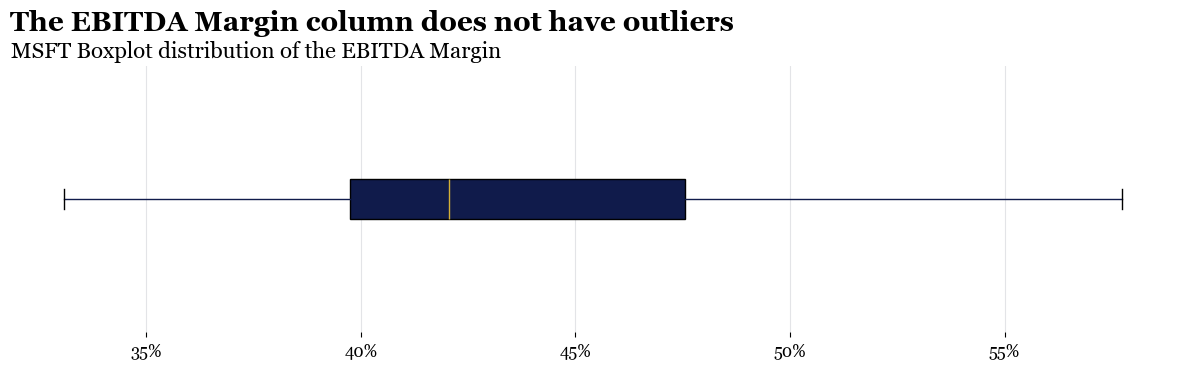

count    66.000000
mean      0.433791
std       0.057934
min       0.330900
25%       0.397425
50%       0.420500
75%       0.475525
max       0.577400
Name: EBITDA_Margin, dtype: float64

In [ ]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('The EBITDA Margin column does not have outliers', 
             ha='left', x=0.014, y=0.92, size=20, weight='bold')
ax.set_title('MSFT Boxplot distribution of the EBITDA Margin', size=16, loc='left')
bp = ax.boxplot(df['EBITDA_Margin'], vert=False, patch_artist=True)
for box in bp['boxes']:
    box.set(facecolor=juan_colors[0], edgecolor='black')
for median in bp['medians']:
    median.set(color=juan_colors[5])
for whisker in bp['whiskers']:
    whisker.set(color=juan_colors[0], linewidth=1)
ax.set_xlabel('')
ax.set_yticks([])
ax.grid(True, color=juan_colors[2], axis='x', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_x = mtick.PercentFormatter(xmax=1, decimals=0)
ax.xaxis.set_major_formatter(formatter_x)
plt.tight_layout()
plt.show()
df['EBITDA_Margin'].describe()

In [ ]:
results = []

# Loop through each feature and run simple linear regression
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[~(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]

    X = filtered_df[[feature]]
    y = filtered_df.loc[X.index, 'EBITDA_Margin']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    results.append({'Variable': feature, 
                    'Outliers': len(df) - len(filtered_df),
                    'R2': r2})

r2_df_no_outliers = pd.DataFrame(results).sort_values('R2', ascending=False)
r2_df_no_outliers

,Variable,Outliers,R2
2,Operating_Income,0,0.824933
10,EBITDA,0,0.810630
6,Operating_Margin,0,0.799818
7,EBIT_Margin,0,0.799818
1,Gross_Profit,0,0.799328
13,Cash_Flow_From_Operating_Activities,0,0.781537
3,Revenue,0,0.744193
8,Pre-Tax_Profit_Margin,1,0.742952
4,R&D_Expenses,0,0.732625
14,Receivables,0,0.712176


Our regression analysis of Microsoft’s quarterly financial data reveals that EBITDA Margin is most strongly explained by core operational metrics such as Operating Income, EBITDA, Operating Margin, EBIT Margin, and Gross Profit. Each of these variables individually accounts for over 79% of the variation in EBITDA Margin, confirming their role as primary drivers of profitability. Importantly, the target variable itself showed no statistical outliers, and after cleaning each independent variable individually, the model’s explanatory power remained stable—indicating that the relationships are robust and not distorted by extreme values.

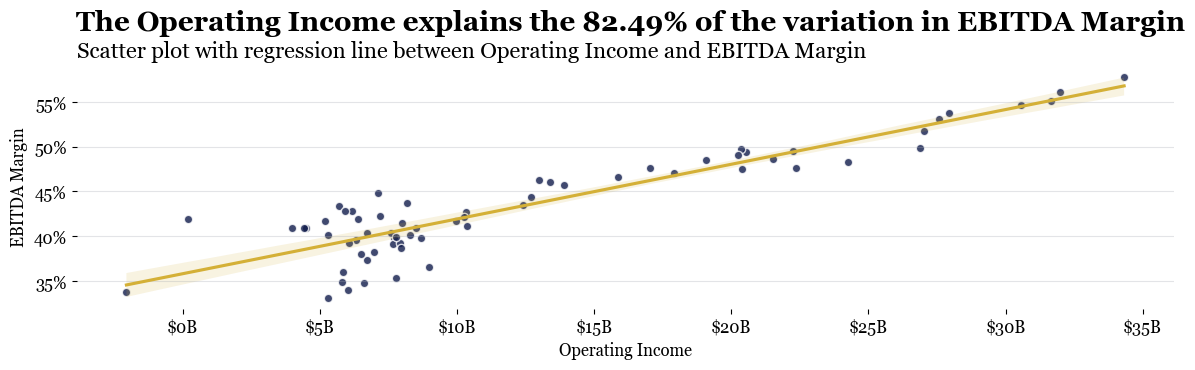

In [62]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('The Operating Income explains the 82.49% of the variation in EBITDA Margin', 
             ha='left', x=0.07, y=0.92, size=20, weight='bold')
ax.set_title('Scatter plot with regression line between Operating Income and EBITDA Margin', size=16, loc='left')
sns.regplot(data= df, x='Operating_Income', y='EBITDA_Margin',
            ax=ax,  color=juan_colors[0],
            scatter_kws={'edgecolor': 'white', 'linewidths': 1},
            line_kws={'color': juan_colors[5]})
ax.set_xlabel('Operating Income')
ax.set_ylabel('EBITDA Margin')
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)
formatter_x = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax.xaxis.set_major_formatter(formatter_x)
plt.tight_layout()
plt.show()